In [321]:
import time
st = time.time()

In [322]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import sklearn as skl
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC,LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, BaggingClassifier, GradientBoostingClassifier
from sklearn.metrics import f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler ,RobustScaler
from sklearn.linear_model import LinearRegression

In [323]:
df = pd.read_csv('/content/drive/MyDrive/water_potability.csv')
df

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1


In [324]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [325]:
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [326]:
imputer = SimpleImputer(strategy='mean')
cols_to_change = ['ph','Sulfate','Trihalomethanes']

for col in cols_to_change:
  df[col] = imputer.fit_transform(df[[col]])

df

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.080795,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,333.775777,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,333.775777,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,333.775777,392.449580,19.903225,66.396293,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,333.775777,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,333.775777,402.883113,11.168946,77.488213,4.708658,1


In [327]:
df.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [328]:
column_name = df.columns
column_name

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


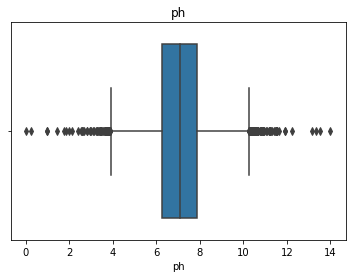

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


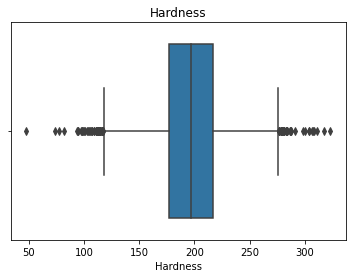

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


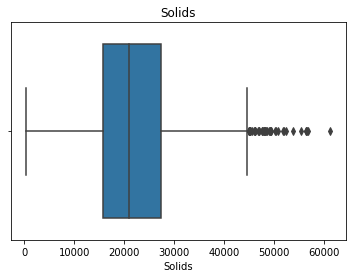

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


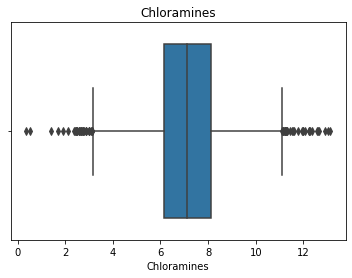

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


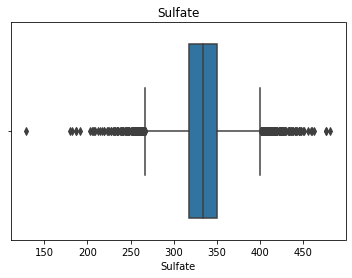

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


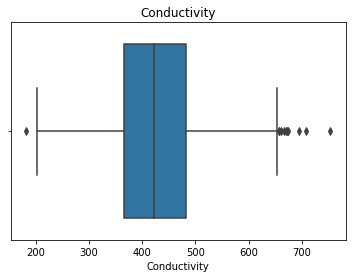

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


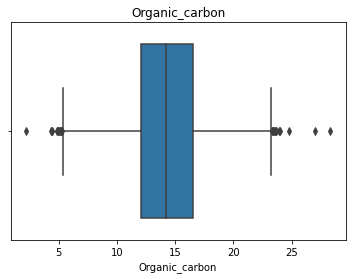

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


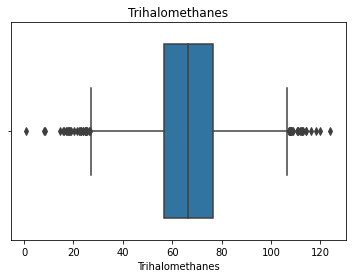

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


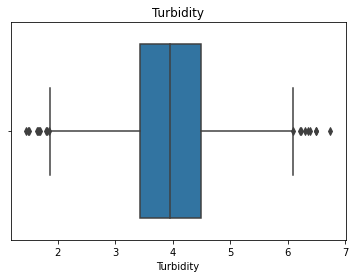

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


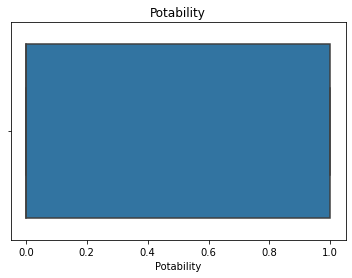

In [329]:
for boxcol in column_name:
  box = sns.boxplot(df[boxcol])
  plt.title(boxcol)
  plt.show(box)

In [330]:
turbidityoutl = (np.where(df['Turbidity']>6) or np.where(df['Turbidity']<2))
trihalomethanesoutl = (np.where(df['Trihalomethanes']<36) or np.where(df['Trihalomethanes']>108))
organic_carbonoutl = (np.where(df['Organic_carbon']<6) or np.where(df['Organic_carbon']>23))
conductivityoutl = (np.where(df['Conductivity']<200) or np.where(df['Conductivity']>666))
sulfateoutl = (np.where(df['Sulfate']<275) or np.where(df['Sulfate']>389))
chloraminesoutl = (np.where(df['Chloramines']<3.5) or np.where(df['Chloramines']>11.5))
solidsoutl = (np.where(df['Solids']>47689))
hardnessoutl = (np.where(df['Hardness']<135) or np.where(df['Hardness']>285))
pHoutl = (np.where(df['ph']<4) or np.where(df['ph']>10.5))

In [331]:
remove = pHoutl + hardnessoutl + solidsoutl + chloraminesoutl + sulfateoutl + conductivityoutl + organic_carbonoutl + trihalomethanesoutl + turbidityoutl

In [332]:
type(remove)

tuple

In [333]:
type(turbidityoutl)

tuple

In [334]:
a = []
for u in remove:
  u = np.ravel(u).tolist()
  a.append(u)
# a

In [335]:
type(a)

list

In [336]:
len(a)

9

In [337]:
count = 0
for i in range(0,8):
  count += len(a[i])

print(count)

574


In [338]:
new_k = []
for i in range(0,8):
  k = a[i]
  for elem in k:
      if elem not in new_k:
          new_k.append(elem)

In [339]:
type(new_k)

list

In [340]:
len(new_k)

510

In [341]:
df.shape

(3276, 10)

In [342]:
for g in new_k:
    df.drop(g, inplace=True)

In [343]:
df.shape

(2766, 10)

In [344]:
# for boxcol in column_name:
#   fig, ax = plt.subplots(figsize = (18,10))
#   plt.title(boxcol)
#   ax.scatter(df[boxcol], df['Potability'])
#   plt.show()

In [345]:
y = df['Potability']
y = pd.DataFrame(y)
y

,Potability
0,0
2,0
3,0
5,0
6,0
...,...
3271,1
3272,1
3273,1
3274,1


In [346]:
x = df.drop(['Potability'], axis=1)
x

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
0,7.080795,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135
2,8.099124,224.236259,19909.541732,9.275884,333.775777,418.606213,16.868637,66.420093,3.055934
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771
5,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708
6,10.223862,248.071735,28749.716544,7.513408,393.663396,283.651634,13.789695,84.603556,2.672989
...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821
3272,7.808856,193.553212,17329.802160,8.061362,333.775777,392.449580,19.903225,66.396293,2.798243
3273,9.419510,175.762646,33155.578218,7.350233,333.775777,432.044783,11.039070,69.845400,3.298875
3274,5.126763,230.603758,11983.869376,6.303357,333.775777,402.883113,11.168946,77.488213,4.708658


In [347]:
Sscaler = StandardScaler()
Rscaler = RobustScaler()

In [348]:
new_col_names = ['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity']

In [361]:
def my_modelfit(my_model,my_x_train,my_y_train):
  my_model.fit(my_x_train, my_y_train.values.ravel())

def my_predict(my_model,my_x_test):
  y_pred = my_model.predict(my_x_test)
  return y_pred

def my_f1_score(my_y_test,my_y_pred):
  f1 = f1_score(my_y_test, my_y_pred, average='weighted') #average='weighted',average='macro',average=None
  return f1

def cr_scaler(my_scaler,my_x_train,my_x_test):
  my_tr = my_scaler.fit_transform(my_x_train)
  my_ts = my_scaler.fit_transform(my_x_test)
  # my_tr, my_ts = pd.DataFrame(my_tr, columns=[new_col_names]), pd.DataFrame(my_ts, columns=[new_col_names])
  return my_tr, my_ts

def my_conf_matrix(my_y_test,my_y_pred):
  cm = confusion_matrix(my_y_test, my_y_pred)
  cm_norm = np.round(cm/np.sum(cm,axis=1).reshape(-1,1),2)
  sns.heatmap(cm_norm,cmap='Greens',annot=True,
              cbar_kws={'orientation' : 'vertical','label' : 'Color bar'},
              fmt='.2f'
              )
  plt.xlabel('Predicted')
  plt.ylabel('Actual')
  plt.show()
  # cm_display = ConfusionMatrixDisplay(cm)
  # cm_display.plot()
  # plt.show()

def my_score(my_model,my_x_train,my_y_train):
  return my_model.score(my_x_train,my_y_train)

In [362]:
x_tr, x_ts, y_tr, y_ts = train_test_split(x, y, train_size=.8, shuffle=True)

In [363]:
x_tr.shape, x_ts.shape, y_tr.shape, y_ts.shape

((2212, 9), (554, 9), (2212, 1), (554, 1))

In [364]:
clf1 = SVC(kernel= 'linear',C=25)
clf2 = KNeighborsClassifier(n_neighbors=25) 
clf3 = DecisionTreeClassifier()
clf4 = RandomForestClassifier(n_estimators=100)
clf5 = SVC(kernel= 'rbf',C=25)
clf5 = LinearSVC()
clf7 = VotingClassifier(
                       voting='hard',
                       estimators=[('knr', clf2), ('rfr', clf3), ('svr2', clf4), ('lsvr', clf5)]
                       )
clf8 = BaggingClassifier(clf3, n_estimators=100, max_samples=.8, n_jobs=-1) #For all cpu use n_jobs = -1
clf9 = GradientBoostingClassifier()

In [365]:
# x_tr[:10]

In [366]:
# x_tr, x_ts = cr_scaler(Sscaler, x_tr, x_ts)
# x_tr.shape, x_ts.shape, y_tr.shape, y_ts.shape

In [367]:
# x_tr[:10]

In [368]:
# x_tr, x_ts = cr_scaler(Rscaler, x_tr, x_ts)
# x_tr.shape, x_ts.shape, y_tr.shape, y_ts.shape

In [369]:
# x_tr[:10]

0.4513205181950272
0.6292947558770343


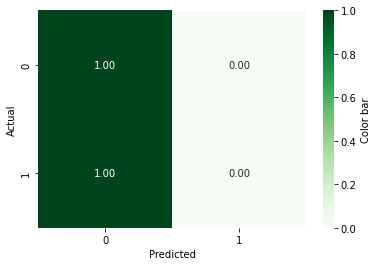

0.5552151936838594
0.6708860759493671


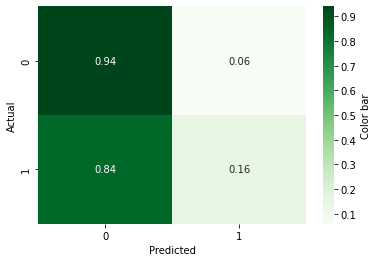

0.5712786445321755
1.0


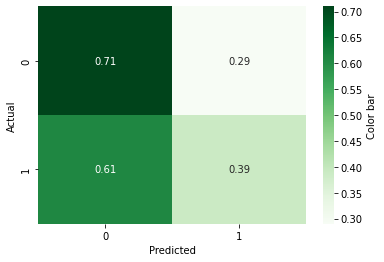

0.6170237278937213
1.0


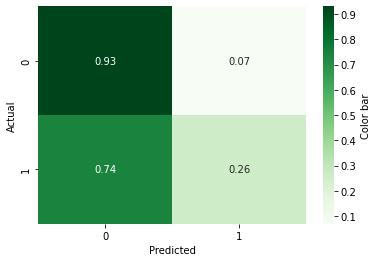

0.45047306272461307
0.6301989150090416


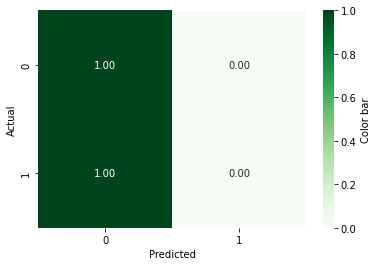

0.5127582356090917
0.7034358047016275


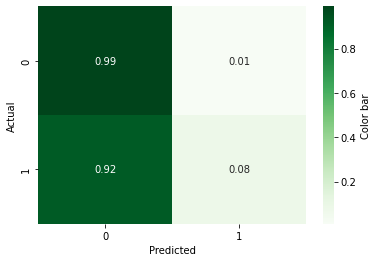

0.606428410681447
1.0


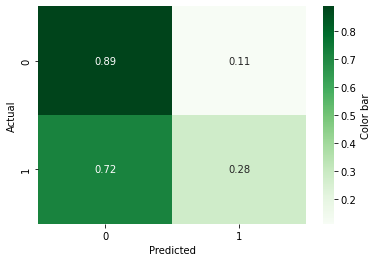

0.5672548738445908
0.7576853526220615


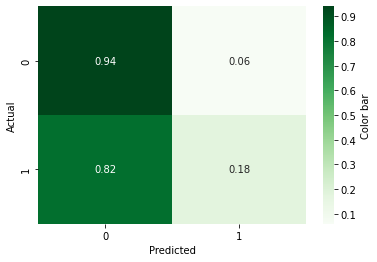

In [370]:
x_tr, x_ts = cr_scaler(Sscaler, x_tr, x_ts)

my_modelfit(clf1, x_tr, y_tr)
y_pred_res1 = my_predict(clf1,x_ts)
print(my_f1_score(y_ts,y_pred_res1))
print(my_score(clf1, x_tr, y_tr))
my_conf_matrix(y_ts,y_pred_res1)

my_modelfit(clf2, x_tr, y_tr)
y_pred_res2 = my_predict(clf2,x_ts)
print(my_f1_score(y_ts,y_pred_res2))
print(my_score(clf2, x_tr, y_tr))
my_conf_matrix(y_ts,y_pred_res2)

my_modelfit(clf3, x_tr, y_tr)
y_pred_res3 = my_predict(clf3,x_ts)
print(my_f1_score(y_ts,y_pred_res3))
print(my_score(clf3, x_tr, y_tr))
my_conf_matrix(y_ts,y_pred_res3)

my_modelfit(clf4, x_tr, y_tr)
y_pred_res4 = my_predict(clf4,x_ts)
print(my_f1_score(y_ts,y_pred_res4))
print(my_score(clf4, x_tr, y_tr))
my_conf_matrix(y_ts,y_pred_res4)

my_modelfit(clf5, x_tr, y_tr)
y_pred_res5 = my_predict(clf5,x_ts)
print(my_f1_score(y_ts,y_pred_res5))
print(my_score(clf5, x_tr, y_tr))
my_conf_matrix(y_ts,y_pred_res5)

my_modelfit(clf7, x_tr, y_tr)
y_pred_res7 = my_predict(clf7,x_ts)
print(my_f1_score(y_ts,y_pred_res7))
print(my_score(clf7, x_tr, y_tr))
my_conf_matrix(y_ts,y_pred_res7)

my_modelfit(clf8, x_tr, y_tr)
y_pred_res8 = my_predict(clf8,x_ts)
print(my_f1_score(y_ts,y_pred_res8))
print(my_score(clf8, x_tr, y_tr))
my_conf_matrix(y_ts,y_pred_res8)

my_modelfit(clf9, x_tr, y_tr)
y_pred_res9 = my_predict(clf9,x_ts)
print(my_f1_score(y_ts,y_pred_res9))
print(my_score(clf9, x_tr, y_tr))
my_conf_matrix(y_ts,y_pred_res9)

0.4513205181950272
0.6292947558770343


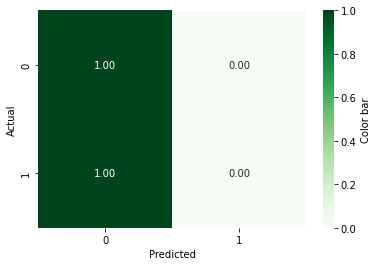

0.5728550900535502
0.6763110307414105


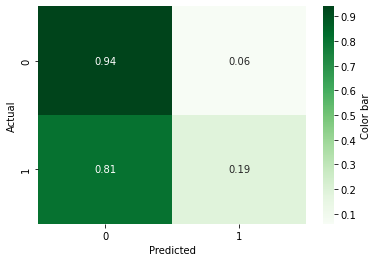

0.559811196949852
1.0


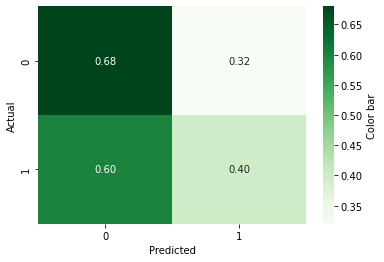

0.6147811314282954
1.0


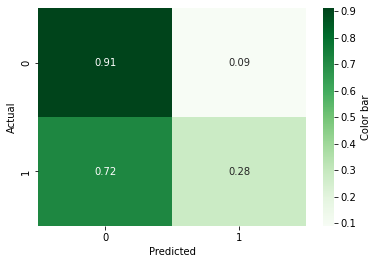

0.45455980248534156
0.6301989150090416


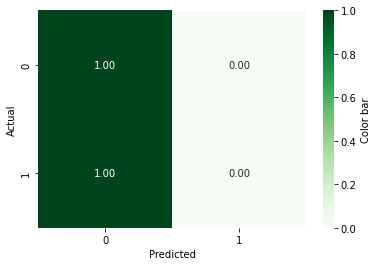

0.5258000597160772
0.7124773960216998


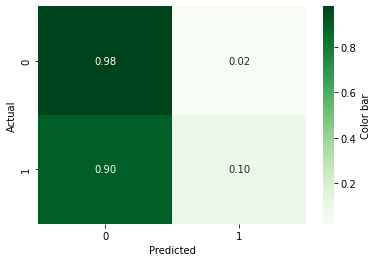

0.6182118625043522
1.0


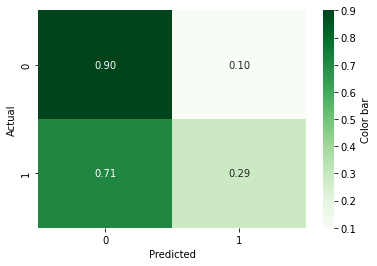

0.5712219118152756
0.7576853526220615


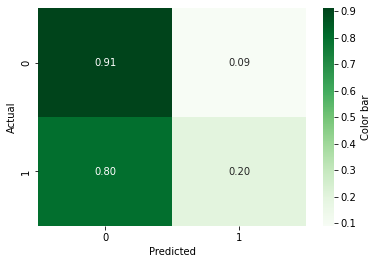

In [371]:
x_tr, x_ts = cr_scaler(Rscaler, x_tr, x_ts)

my_modelfit(clf1, x_tr, y_tr)
y_pred_res1 = my_predict(clf1,x_ts)
print(my_f1_score(y_ts,y_pred_res1))
print(my_score(clf1, x_tr, y_tr))
my_conf_matrix(y_ts,y_pred_res1)

my_modelfit(clf2, x_tr, y_tr)
y_pred_res2 = my_predict(clf2,x_ts)
print(my_f1_score(y_ts,y_pred_res2))
print(my_score(clf2, x_tr, y_tr))
my_conf_matrix(y_ts,y_pred_res2)

my_modelfit(clf3, x_tr, y_tr)
y_pred_res3 = my_predict(clf3,x_ts)
print(my_f1_score(y_ts,y_pred_res3))
print(my_score(clf3, x_tr, y_tr))
my_conf_matrix(y_ts,y_pred_res3)

my_modelfit(clf4, x_tr, y_tr)
y_pred_res4 = my_predict(clf4,x_ts)
print(my_f1_score(y_ts,y_pred_res4))
print(my_score(clf4, x_tr, y_tr))
my_conf_matrix(y_ts,y_pred_res4)

my_modelfit(clf5, x_tr, y_tr)
y_pred_res5 = my_predict(clf5,x_ts)
print(my_f1_score(y_ts,y_pred_res5))
print(my_score(clf5, x_tr, y_tr))
my_conf_matrix(y_ts,y_pred_res5)

my_modelfit(clf7, x_tr, y_tr)
y_pred_res7 = my_predict(clf7,x_ts)
print(my_f1_score(y_ts,y_pred_res7))
print(my_score(clf7, x_tr, y_tr))
my_conf_matrix(y_ts,y_pred_res7)

my_modelfit(clf8, x_tr, y_tr)
y_pred_res8 = my_predict(clf8,x_ts)
print(my_f1_score(y_ts,y_pred_res8))
print(my_score(clf8, x_tr, y_tr))
my_conf_matrix(y_ts,y_pred_res8)

my_modelfit(clf9, x_tr, y_tr)
y_pred_res9 = my_predict(clf9,x_ts)
print(my_f1_score(y_ts,y_pred_res9))
print(my_score(clf9, x_tr, y_tr))
my_conf_matrix(y_ts,y_pred_res9)

In [372]:
end = time.time()
print((end-st)/60)

2.002799030145009
